## 原始输入数据

你将要使用的数据已从CSV中做了预处理，如下所示：

| 时间戳  |  位移   |    yaw_rate    | 加速度  |
| :--: | :---: | :------------: | :--: |
| 0.0  |   0   |      0.0       | 0.0  |
| 0.25 |  0.0  |      0.0       | 19.6 |
| 0.5  | 1.225 |      0.0       | 19.6 |
| 0.75 | 3.675 |      0.0       | 19.6 |
| 1.0  | 7.35  |      0.0       | 19.6 |
| 1.25 | 12.25 |      0.0       | 0.0  |
| 1.5  | 17.15 | -2.82901631903 | 0.0  |
| 1.75 | 22.05 | -2.82901631903 | 0.0  |
| 2.0  | 26.95 | -2.82901631903 | 0.0  |
| 2.25 | 31.85 | -2.82901631903 | 0.0  |
| 2.5  | 36.75 | -2.82901631903 | 0.0  |
| 2.75 | 41.65 | -2.82901631903 | 0.0  |
| 3.0  | 46.55 | -2.82901631903 | 0.0  |
| 3.25 | 51.45 | -2.82901631903 | 0.0  |
| 3.5  | 56.35 | -2.82901631903 | 0.0  |

这些数据目前保存在一个名为`trajectory_example.pickle`的文件中。通过我们提供的辅助函数，这些数据可以加载出来（如下所示）：

In [1]:
from helpers import process_data
%matplotlib inline

data_list = process_data("trajectory_example.pickle")

for entry in data_list:
    print(entry)

(0.0, 0, 0.0, 0.0)
(0.25, 0.0, 0.0, 19.600000000000001)
(0.5, 1.2250000000000001, 0.0, 19.600000000000001)
(0.75, 3.6750000000000003, 0.0, 19.600000000000001)
(1.0, 7.3500000000000005, 0.0, 19.600000000000001)
(1.25, 12.25, 0.0, 0.0)
(1.5, 17.149999999999999, -2.8290163190291664, 0.0)
(1.75, 22.049999999999997, -2.8290163190291664, 0.0)
(2.0, 26.949999999999996, -2.8290163190291664, 0.0)
(2.25, 31.849999999999994, -2.8290163190291664, 0.0)
(2.5, 36.749999999999993, -2.8290163190291664, 0.0)
(2.75, 41.649999999999991, -2.8290163190291664, 0.0)
(3.0, 46.54999999999999, -2.8290163190291664, 0.0)
(3.25, 51.449999999999989, -2.8290163190291664, 0.0)
(3.5, 56.349999999999987, -2.8290163190291664, 0.0)


如你所见，`data_list`中的每个条目都包含四个字段。这些字段对应于`timestamp`（秒）、`displacement`（米）、`yaw_rate`（弧度/秒）以及`acceleration`（米/秒/秒）。

### 这个项目的重点！
**数据讲述了一个故事，但你必须知道如何找到这个故事！** 

上面的所有数据是你需要重建一个相当复杂的车辆轨迹的所有信息。处理完 **这些** 确切的数据后，可以生成车辆X和Y位置的这个图表：

![](https://d17h27t6h515a5.cloudfront.net/topher/2017/December/5a3044ac_example-trajectory/example-trajectory.png)

正如你所看到的，这辆车首先加速前进，然后右转，直到它差不多完成一整圈转弯。

### 数据说明

**`timestamp`** - 时间戳都以秒为单位进行测量的。连续时间戳之间的时间（$\Delta t$）在轨迹的数据集*内*（但不在数据集之间）始终保持一致。

**`displacement`** - 里程表的位移数据以米为单位，并给出到此为止的**总**行程。

**`yaw_rate`** - 横摆角速度以弧度/秒为单位，按照惯性，正横摆对应于*逆时针*旋转。

**`acceleration`** -  以 $\frac{m/s}{s}$来衡量加速度的大小，且加速度始终与**车辆运动方向**（向前）一致。

> **注** - 在重建车辆轨迹时，你可能不需要使用所有这些数据。

## 你的任务
你的任务是完成以下函数，所有这些函数都将把一个处理后的`data_list`（具有N个条目，每个$\Delta t$分开）作为输入：

* `get_speeds` - 返回一个长度为 $N​$的列表，其中条目 $i​$ 包含车辆在 $t = i \times \Delta t​$ 时的速度（$m/s​$）

* `get_headings` - 返回一个长度为$N$的列表，其中条目 $i$ 包含车辆在$t = i \times \Delta t$ 处的行驶方向（弧度，$0 \leq \theta < 2\pi$）

* `get_x_y` - 返回一个长度为 $N$的列表，其中条目 $i$ 包含对应于车辆的 $x$ 和 $y$ 坐标（米）的 $t = i \times \Delta t$ 处的`(x, y)`元组

* `show_x_y` - 生成车辆位置的 x - y 散点图。

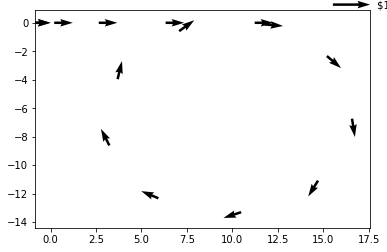

In [2]:
# I've provided a solution file called solution.py
# You are STRONGLY encouraged to NOT look at the code
# until after you have solved this yourself.
#
# You SHOULD, however, feel free to USE the solution 
# functions to help you understand what your code should
# be doing. For example...
from helpers import process_data
import solution

data_list = process_data("trajectory_example.pickle")
solution.show_x_y(data_list)

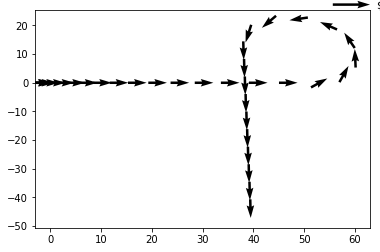

In [3]:
# What about the other trajectories?

three_quarter_turn_data = process_data("trajectory_1.pickle")
solution.show_x_y(three_quarter_turn_data, increment=10)

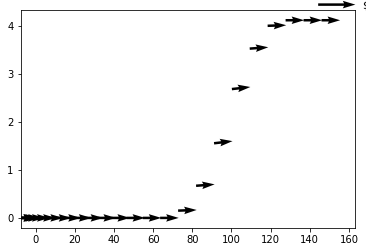

In [4]:
merge_data = process_data('trajectory_2.pickle')
solution.show_x_y(merge_data,increment=10)

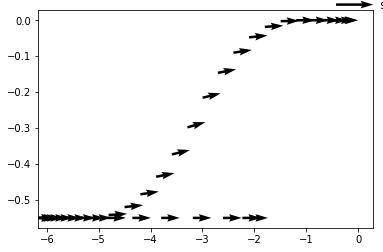

In [59]:
parallel_park = process_data("trajectory_3.pickle")
solution.show_x_y(parallel_park,increment=5)

**如何制作那些很酷的箭头呢？！**

我在谷歌中进行了搜索“pylines plot grid of arrows”，在第二个结果中，我看到了一些真正有用的 [演示代码](https://matplotlib.org/examples/pylab_examples/quiver_demo.html) 。

## 测试正确性
测试代码在该 notebook 的末尾会提供给你。请注意，只有`get_speeds`，`get_x_y`和`get_headings`会自动进行测试。你必须通过手动比较你的绘图与预期绘图来“测试”`show_x_y` 函数。

### 初始车辆状态

该车辆始终以所有状态变量等于零开始，在t = 0时，意思是说`x`、`y`、`theta`（前进方向）、`speed`、`yaw_rate`以及`acceleration`都为0。

----

## 你的代码！
完成下面单元格中的函数。我建议按照显示的顺序来依次完成。使用 notebook 末尾的单元格进行测试。

In [57]:
from math import cos, sin, pi
import matplotlib.pyplot as plt

def get_speeds(data_list):
    """
    data_list[3]
    使用加速度计算
    """
    speeds = [0]
    for i in range(1, len(data_list)):
        acceleration = data_list[i][3]
        delta_time = data_list[i][0] - data_list[i-1][0]
        speed = speeds[i-1] + acceleration * delta_time
        speeds.append(speed)
    return speeds

def get_headings(data_list):
    """
    data_list[2]
    单位为弧度/秒
    """
    headings = [data_list[0][2]]
    for i in range(1, len(data_list)): 
        yaw_rate = data_list[i][2]
        delta_time = data_list[i][0] - data_list[i-1][0]
        heading = headings[i-1] + yaw_rate * delta_time
        headings.append(heading)
    return headings

def get_x_y(data_list):
    """
    data_list[1], get_headings
    使用里程和角度计算
    """
    headings = get_headings(data_list)
    x = 0
    y = 0
    positions = [(x,y)]
    for i in range(1, len(data_list)):
        delta_displacement = data_list[i][1] - data_list[i-1][1]
        x += delta_displacement * cos(headings[i])
        y += delta_displacement * sin(headings[i])
        positions.append((x, y))
    return positions
        
        
def show_x_y(data_list):
    positions = get_x_y(data_list)
    X = [p[0] for p in positions]
    Y = [p[1] for p in positions]
    plt.plot(X, Y)
    plt.show()

## 测试
运行下面的单元格，测试你的函数。

In [23]:
from testing import test_get_speeds, test_get_x_y, test_get_headings

test_get_speeds(get_speeds)

PASSED test of get_speeds function!


In [54]:
test_get_x_y(get_x_y)

PASSED test of get_x_y function!


In [55]:
test_get_headings(get_headings)

PASSED test of get_headings function!


In [27]:
import solution 
from helpers import process_data
from math import pi

T1 = process_data("trajectory_1.pickle")
T2 = process_data("trajectory_2.pickle")
T3 = process_data("trajectory_3.pickle")

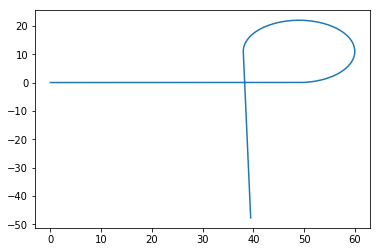

In [58]:
show_x_y(T1)

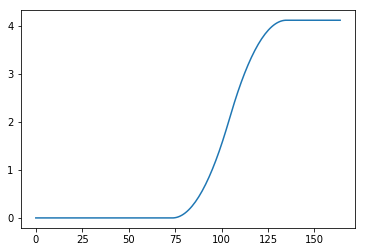

In [60]:
show_x_y(T2)

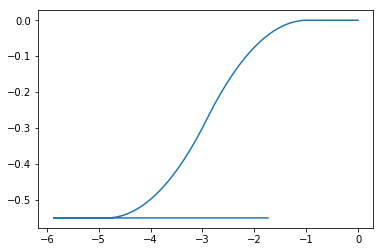

In [61]:
show_x_y(T3)

In [95]:
"""
箭头画法可以参考
https://blog.csdn.net/liuchengzimozigreat/article/details/84566650
"""
def show_x_y2(data_list):
    positions = get_x_y(data_list)
    X = [p[0] for p in positions]
    Y = [p[1] for p in positions]
    headings = get_headings(data_list)
    U = [cos(i) for i in headings]
    V = [sin(i) for i in headings]
    
    # 箭头太大， 全部打印到图上会连到一起，这里就每8个点打印一次
    step = 10
    Q = plt.quiver(X[::step], Y[::step], U[::step], V[::step], pivot="mid")
    qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
#     plt.plot(X, Y)
    plt.show()

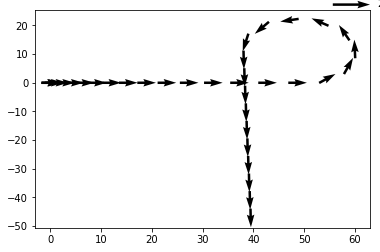

In [96]:
show_x_y2(T1)

# 参数
X: 1D or 2D array, sequence, optional

   1维或2维数组，序列(sequence)，可自选（optional）

   箭头位置的x坐标

Y:1D or 2D array, sequence, optional

   1维或2维数组，序列，可自选

   箭头位置的y坐标

U: 1D or 2D array or masked array, sequence

   1维或2维数组或掩码数组（参看masked array https://blog.csdn.net/liukai2918/article/details/78419302），序列

   箭头矢量的x分量

V:1D or 2D array or masked array, sequence

   1维或2维数组或掩码数组，序列

   箭头矢量的y分量

C: 1D or 2D array, sequence, optional

   1维或2维数组，序列(sequence)，可自选

   箭头颜色

units（单位）: [ 'width' | 'height' | 'dots' | 'inches' | 'x' | 'y' | 'xy' ]

   箭头尺寸（除长度外）以此单位的倍数计算——即是说选定单位后，箭头尺寸即是此单位的倍数

   ‘width’或’height’：轴（axis）的宽度或高度

   ‘dots’或’inches’：像素或英寸，基于图的dpi

   ‘x’, ‘y’或‘xy’：分别是X、Y或X2+Y2的数据单位（data units）

   箭头依单位不同而不同。对于’x’或’y’，箭头会随着其一的增大（zoom in）而增大；对于其他单位，箭头的大小与缩放状态（zoom state）无关。对于’width’或’height’，当窗口重置时，箭头的大小会随着轴（axes）的宽度和高度的增大而增大；低于同意’dots’或’inches’。重置不会改变箭头。

angles: [‘uv’ | ‘xy’], array, 可自选

   用于决定箭头角度的方法，默认是’uv’

‘uv’:箭头的纵横比（axis aspect ratio）为1，所以若U*==*V，则绘图上箭头的方向与水平轴逆时针呈45度（正向右）。

‘xy’: 箭头从（x，y）指向（x + u，y + v）。例如，使用它来绘制渐变场(gradient field)。

或者，可以将任意角度指定为以水平轴逆时针方向的度数值的数组。

注意：反转数据轴将相应地仅使用angles='xy'反转箭头。

scale : None, float, optional

   每个箭头长度单位的数据单位数量，例如，每个绘图宽度m / s；参数scale越小箭头越长。默认是None

   若是None，一个简单的自动缩放算法将被采用，基于平均矢量长度和适量的数量。箭头长度单位由scale_units参数给出。

scale_units : [ 'width' | 'height' | 'dots' | 'inches' | 'x' | 'y' | 'xy' ], None, optional

   如果关键字参数scale是None，那么箭头长度单位默认是None

   例如：scale_units是’inches’，scale是2.0，(u,v)=(1,0)，那么矢量将会是0.5英寸长。

   如果scale_units是’width/height’，那么矢量长度是轴’width/height’的半长

   如果scale_units是’x’那么矢量是x轴单位的0.5倍。要在x-y平面上画矢量，使得u和v与x和y有相同的单位，则应另angles=’xy’, scale_units’xy’, scale=1.

width : scalar(标量), optional

   箭杆（shaft）的宽度，以箭头单位衡量。默认是由以上单位的选择和矢量数量来决定。常用的初始值是0.005倍的画的宽度（width of the plot）

headwidth : scalar, optional

   头部宽度相对于箭杆宽度的倍数，默认是3倍

headlength : scalar, optional

   轴交叉处的头部长度，默认是4.5

minshaft : scalar, optional

   箭头比例的长度，以头部长度为单位。不要将其设置为小于1，否则小箭头看起来会很糟糕

minlength : scalar, optional

   最小长度为轴宽的倍数；如果箭头长度小于此值，则绘制该直径的点（六边形）。默认值为1

pivot : [ 'tail' | 'mid' | 'middle' | 'tip' ], optional

   箭头在网格点上的部分;箭头围绕这一点旋转，因此称为枢轴。

color : [ color | color sequence ], optional
